# IMDB 리뷰 데이터셋 

- 유명한 인터넷 영화 데이터베이스인 imdb.com 에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 말뭉치 

# 자연어 처리(Natural Language Processing; NLP)

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야 
- 세부 분야 
    - 음성 인식 
    - 기계 번역
    - 감성 분석 
- 자연어 처리 분야에서는 훈련 데이터를 말뭉치(corpus)라고 부름. 

# 임베딩 

- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 나눈 결과 혹은 그 과정 전체

<img src = "embedding.png">

- 컴퓨터에서 처리하는 모든 것은 숫자로 이뤄진 데이터 
    - 따라서 텍스트 그 자체를 신경망에 전달하지 않음. 
    - 합성곱 신경망에서 이미지를 다룰 때는 이미지가 정수 픽셀값으로 이뤄져 있어서 특별히 변환을 하지 않음. 

<br> 

- 텍스트 임베딩의 가장 쉬운 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것 
    - 예) 
        - he : 10
        - follows : 11
        - the : 12
        - cat : 13
        
    - 한계
        - 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없음.
            - he를 10으로 매핑하고 cat을 13에 매핑하더라도 cat이 he보다 좋거나 크다는 뜻이 아님. 
            
    - 좀 더 발전된 게 원핫 인코딩, 더 발전된 게 워드 임베딩
    
    - 정수 중 몇 가지는 특정한 용도로 예약되어 있는 경우가 많음. 
        - 예) 
            - 0 : 패딩 
            - 1 : 문장 시작 
            - 2 : 어휘 사전에 없는 토큰 
        - 어휘 사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록 

- 일반적으로 영어 문장은 모두 소문자로 바꾸고 구두점을 삭제한 다음 공백을 기준으로 분리 
     - 이렇게 분리된 단어를 "토큰(token)"이라고 부름.
         - 하나의 샘플은 여러 개의 토큰으로 이뤄져 있고 이때 하나의 토큰이 하나의 타임 스텝에 해당 
     - 영어 말뭉치에서 토큰은 단어와 같이 취급하는 경우가 많음. 
         - 한국어는 조사가 발달되어 있어 공백으로 나누는 것만으로는 부족함. 
             - 일반적으로 한글은 형태소 분석을 통해 토큰 분리 

# 원핫 인코딩을 활용한 RNN 텍스트 분류 

## 데이터 준비 

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용 
# num_words : 단어 빈도가 많은 순서로 num_words 만큼 보존 
# 고빈도 500개 외의 단어들은 unk 단어 처리됨. 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

In [5]:
# 학습/테스트 데이터 모두 2만 5천 개
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
# 리뷰의 길이 출력 
len(x_train[0]), len(x_train[1])

(218, 189)

In [8]:
x_train

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

- 각각 25000개의 샘플로 이뤄져 있음. 
- 텍스트 길이가 제각각임. 
    - 고정 크기의 2차원 배열에 담는 것보다 리뷰마다 별도의 파이선 리스트로 담아야 메모리를 효율적으로 사용할 수 있음. 

In [7]:
# 첫 번째 리뷰
x_train[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [9]:
# 타깃 데이터 
# 0 : 부정, 1 : 긍정 
y_train[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [3]:
# train 데이터 가지고 훈련/검증 데이터 분할 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size=0.2,
                                                 random_state=4)

In [4]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((20000,), (5000,), (20000,), (5000,))

## 각 리뷰의 길이 확인 
- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 길이, 길이 최소값, 길이 최대값 확인 

In [5]:
lengths = np.array([len(x) for x in x_train])

# 길이 평균값과 중간값, 최소값, 최대값 
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

238.1658 177.0 11 2494


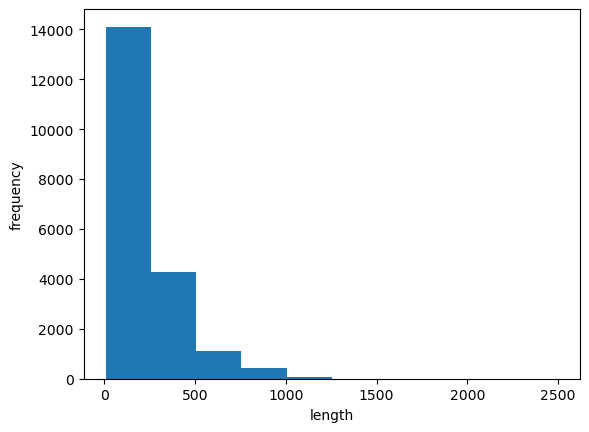

In [6]:
plt.figure()

plt.hist(lengths)

plt.xlabel("length")
plt.ylabel("frequency")

plt.show()

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문 
- 대부분의 리뷰는 짧기 때문에 이번 예제에서는 리뷰의 길이를 100으로 맞춰서 사용 
    - 100보다 짧은 리뷰는 길이를 100에 맞추기 위해 패딩 필요 
        - 패딩을 나타내는 토큰으로는 0 사용

In [7]:
# x_train의 길이를 100으로 맞추기 
train_seq = pad_sequences(x_train, maxlen=100)
# truncating='pre' 디폴트 
# padding='pre' 디폴트 

- maxlen에 원하는 길이를 지정하면 그것보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩

In [8]:
# train_seq 크기 확인 
train_seq.shape

(20000, 100)

In [18]:
train_seq

array([[ 35,   2,   2, ...,  49,   2,   2],
       [  2,  17,  31, ...,   2, 312, 489],
       [  0,   0,   0, ...,  17,  12, 214],
       ...,
       [ 16, 107,   2, ..., 335,  33,  12],
       [ 26,   2, 195, ...,  39,   4,  22],
       [  0,   0,   0, ...,  31,  80,   2]])

In [22]:
train_seq[0]

array([ 35,   2,   2,   2,   4, 481,   2,   2,  53,  17,   6,   2,   2,
        74,  15,   7,   2,   2,   2,   2, 198,   2,   2, 467,   2, 103,
        94,   2,   2, 350,   2,   2,   2, 179,   2,   5,   2,   6,   2,
       471,  26,   2,   5, 157, 125, 257,   2,   2,   2,   2,  56,   4,
         2,  17,   4,   2,  37,   2, 225,  53, 170,  23,  74,  51,   9,
       112,   2,  23,  35,   2,   2, 177,   2,   2,   2,  34,   2,   2,
         5,   2,   2,   2,  10,  10,   6,   2,   2,  21,   2,   2, 453,
         2,  34,  94, 107,   2,   5,  49,   2,   2])

In [25]:
print(x_train[0])

[1, 2, 2, 2, 106, 18, 4, 2, 2, 7, 6, 2, 351, 2, 2, 116, 17, 2, 2, 2, 18, 49, 2, 2, 2, 21, 2, 2, 2, 314, 2, 14, 2, 2, 365, 9, 6, 2, 7, 2, 2, 2, 5, 2, 114, 2, 2, 23, 94, 55, 2, 381, 48, 2, 2, 2, 2, 2, 5, 2, 2, 66, 36, 92, 79, 8, 81, 32, 15, 76, 262, 315, 4, 2, 2, 2, 2, 121, 36, 2, 2, 11, 6, 2, 315, 4, 2, 2, 8, 2, 6, 2, 19, 158, 2, 2, 2, 449, 253, 21, 14, 9, 54, 4, 2, 48, 2, 2, 9, 2, 200, 2, 5, 2, 105, 103, 6, 2, 2, 7, 2, 5, 2, 2, 2, 429, 257, 85, 4, 107, 216, 8, 35, 2, 15, 2, 98, 2, 257, 2, 2, 5, 28, 6, 2, 2, 14, 62, 140, 23, 8, 297, 6, 2, 173, 11, 4, 2, 333, 320, 7, 4, 65, 19, 15, 2, 2, 2, 131, 68, 2, 402, 23, 2, 225, 53, 21, 51, 75, 79, 9, 2, 5, 14, 9, 2, 34, 15, 2, 43, 2, 50, 2, 277, 15, 238, 43, 97, 25, 2, 2, 2, 8, 79, 15, 46, 7, 4, 2, 10, 10, 4, 2, 9, 2, 2, 21, 2, 2, 18, 12, 5, 14, 186, 2, 224, 8, 2, 19, 94, 2, 2, 2, 2, 106, 17, 4, 172, 2, 9, 2, 120, 5, 120, 174, 5, 25, 124, 142, 9, 24, 179, 208, 5, 4, 2, 2, 266, 83, 297, 150, 285, 15, 127, 2, 2, 99, 2, 21, 4, 2, 2, 9, 2, 4, 2, 2, 2

In [26]:
print(x_train[0][-10:])

[453, 2, 34, 94, 107, 2, 5, 49, 2, 2]


- pad_sequences 사용 시 디폴트로는 앞부분을 잘라낸다는 것을 확인 가능!
    - 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하기 때문에, 리뷰 끝에 결정적인 소감을 말할 가능성이 높음.
    - 시퀀스의 뒷부분을 잘라내고 싶다면 
        - truncating='post' 로 설정 

In [27]:
train_seq[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   2,  31,   7,   4,   2,
         7,   4,   2, 182,  14,  22,   9,  24,   2,   8,  30,   2,   4,
       350,   2, 108,   7,  32,  58,  10,  10,  48,  25, 296,  14,  22,
         5, 197,  12,  16, 233,  85,  74, 389,   2, 387,  72, 124,  89,
         2,   2, 239,   9,  17,  52,  17,  12, 214])

- 패딩 토큰은 시퀀스의 앞부분에 추가됨. 
    - 시퀀스의 마지막에 있는 단어가 셀의 은닉상태에 가장 큰 영향을 미치게 되기 때문 
    - 뒷부분에 패딩을 추가하고 싶다면 
        - padding='post' 설정 

In [9]:
# 검증 세트의 길이를 100으로 맞추기 
val_seq = pad_sequences(x_val, maxlen=100)

val_seq.shape

(5000, 100)

# 모델 구성 

- 케라스의 SimpleRnn 클래스 사용 
- 이진 분류 
    - 출력층은 1개의 뉴런을 가지고 시그모이드 출력층 함수 사용

In [10]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # 원핫인코딩 - 500개 단어 
model.add(keras.layers.Dense(1, activation='sigmoid'))


""" 텐서플로우 LSTM 

class RNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(RNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                         output_dim=kargs['embedding_dimension'])
        
        self.lstm_1_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'],
                                                return_sequences=True)
        self.lstm_2_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'])
        
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
        self.fc1 = layers.Dense(units=kargs['dense_dimension'],
                               activation=tf.keras.activations.tanh)
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                               activation=tf.keras.activations.sigmoid)
        
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)      # 1) 임베딩 후 드롭아웃 
        x = self.lstm_1_layer(x)
        x = self.lstm_2_layer(x)
        x = self.dropout(x)      # 2) LSTM 통과 후 드롭아웃 
        x = self.fc1(x)
        x = self.dropout(x)      # 3) 선형층1 통과 후 드롭아웃 
        x = self.fc2(x)
        
        return x

"""

""" 파이토치 엘만RNN

class ElmanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, batch_first=False):
        super(ElmanRNN, self).__init__()
        
        self.rnn_cell = nn.RNNCell(input_size, hidden_size)
        
        self.batch_first = batch_first
        self.hidden_size = hidden_size
        
    def initialize_hidden(self, batch_size):
        return torch.zeros((batch_size, self.hidden_size))
    
    def forward(self, x_in, initialize_hidden=None):
        if self.batch_first:
            batch_size, seq_size, feat_size = x_in.size()
            x_in = x_in.permute(1,0,2)
        else:
            seq_size, batch_size, feat_size = x_in.size()
            
        hiddens = []
        
        if initialize_hidden is None:
            initial_hidden = self.initialize_hidden(batch_size)
            initial_hidden = initial_hidden.to(x_in.device)
            
        hidden_t = initial_hidden
        
        for t in range(seq_size):
            hidden_t = self.rnn_cell(x_in[t], hidden_t)
            hiddens.append(hidden_t)
            
        hiddens = torch.stack(hiddens)
        
        if self.batch_first:
            hiddens = hiddens.permute(1,0,2)
        
        return hiddens

"""

' 파이토치 엘만RNN\n\nclass ElmanRNN(nn.Module):\n    def __init__(self, input_size, hidden_size, batch_first=False):\n        super(ElmanRNN, self).__init__()\n        \n        self.rnn_cell = nn.RNNCell(input_size, hidden_size)\n        \n        self.batch_first = batch_first\n        self.hidden_size = hidden_size\n        \n    def initialize_hidden(self, batch_size):\n        return torch.zeros((batch_size, self.hidden_size))\n    \n    def forward(self, x_in, initialize_hidden=None):\n        if self.batch_first:\n            batch_size, seq_size, feat_size = x_in.size()\n            x_in = x_in.permute(1,0,2)\n        else:\n            seq_size, batch_size, feat_size = x_in.size()\n            \n        hiddens = []\n        \n        if initialize_hidden is None:\n            initial_hidden = self.initialize_hidden(batch_size)\n            initial_hidden = initial_hidden.to(x_in.device)\n            \n        hidden_t = initial_hidden\n        \n        for t in range(seq_size):\n

- SimpleRNN
    - 첫 번째 매개변수는 사용할 유닛의 개수 
    - input_shape
        - 입력 차원의 첫 번째 차원은 샘플의 길이 
        - 입력 차원의 두 번째 차원은 고유한 단어 수 (num_words)
            - load_data() 함수에서 500개 단어만 사용하도록 지정했기 때문에 이번 예제의 고유한 단어 수는 500
            
    - activation 
        - 기본값은 "tanh" (하이퍼볼릭 탄젠트) 
            
- 원핫인코딩을 사용하는 이유 
    - 토큰을 정수로 변환한 데이터를 그대로 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듦. 
        - 정수 사이에는 어떤 관련도 없고 20번 토큰이 10번 토큰보다 중요한 것이 아님. 

In [11]:
# 케라스에서 제공하는 원핫인코딩을 위한 함수 
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [12]:
train_oh[0][0][:100]
# 0번째 문장의 0번째 단어의 단어사전 속 위치 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [13]:
np.sum(train_oh[0][0])

1.0

- 하나의 원소만 1이고 나머지 원소는 모두 0

In [14]:
# val_seq 원핫인코딩 
val_oh = keras.utils.to_categorical(val_seq)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


- SimpleRNN에 전달할 샘플의 크기는 (100,500)이지만 순환층은 마지막 타임스텝의 은닉상태만 출력 
    - 출력의 크기가 순환층의 뉴런 개수와 동일 
    
- 파라미터 개수 
    - 입력 토큰은 500 차원의 원핫인코딩 배열 
    - 배열이 순환층의 뉴런 8개와 완전연결 
        - 500 * 8 = 4000
    - 순환층의 은닉상태는 다시 다음 타임스텝에 사용하기 위해 또 다른 가중치와 곱해짐 
        - 은닉상태 크기 * 유닛 개수
            - 8 * 8 = 64
    - 각 뉴런마다 하나의 절편 
        - 8 
    - 4000 + 64 + 8 = 4072 

# 모델 훈련

In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-simplernn-model.h5",
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_oh, y_train, epochs=100, batch_size=64,
                   validation_data=(val_oh, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6966 - accuracy: 0.5044 - val_loss: 0.6959 - val_accuracy: 0.5058
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6916 - accuracy: 0.5239 - val_loss: 0.6919 - val_accuracy: 0.5240
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6870 - accuracy: 0.5462 - val_loss: 0.6863 - val_accuracy: 0.5428
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6771 - accuracy: 0.5881 - val_loss: 0.6687 - val_accuracy: 0.6152
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6504 - accuracy: 0.6420 - val_loss: 0.6437 - val_accuracy: 0.6546
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6233 - accuracy: 0.6778 - val_loss: 0.6239 - val_accuracy: 0.6754
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6011 - accuracy: 0.7028 - val_loss: 0.6056 - val_accuracy

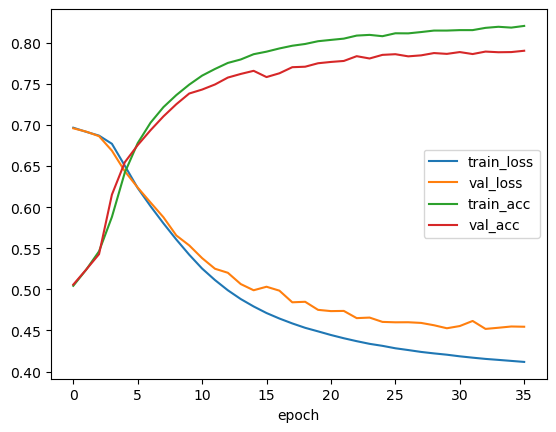

In [17]:
plt.figure()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()

- 원핫 인코딩의 단점 
    - 입력 데이터가 매우 커짐.

In [18]:
train_seq.nbytes, train_oh.nbytes
# 이전 정수인코딩 8백만 바이트 
# 원핫인코딩 이후 40억 바이트 --> 500배 차이 

(8000000, 4000000000)

- 토큰 1개를 500차원으로 늘렸기 때문에 500배가 커짐. 
    - 훈련 데이터가 커질수록 문제가 더 심해짐. 

# 단어 임베딩을 활용한 RNN 텍스트 분류 

<img src = "embedding.png">

- 단어 임베딩 (word embedding)
    - 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법 
    - 각 단어를 고정된 크기의 실수 벡터로 변환
    
- 단어 임베딩으로 만들어진 벡터를 원핫 인코딩보다 훨씬 의미있는 값으로 채워져 있음. 
    - 자연어 처리에서 더 좋은 성능을 내는 경우가 많음.
    - 단어 임베딩 벡터를 만드는 층은 Embedding 클래스로 케라스에서 제공 
        - 처음에는 모든 벡터가 랜덤하게 초기화되고 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습 
        
- 단어 임베딩의 장점 
    - 입력으로 정수 데이터를 받음. 
        - 원핫 인코딩으로 변경된 배열이 아니라 train_seq을 바로 사용할 수 있음. 
        - 메모리를 훨씬 효율적으로 사용할 수 있음. 
    - 원핫 인코딩보다 훨씬 작은 크기로도 단어를 잘 표현할 수 있음.

In [19]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(input_dim=500, # 어휘사전 크기 
                                  output_dim=16, # 임베딩 벡터 크기 
                                  input_length=100)) # input_shape 아님 
# 각 500개 단어를 16개의 숫자로 임베딩 표현 
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


- Embedding
    - 첫 번째 매개변수는 어휘사전의 크기 
        - 앞에서 IMDB 데이터셋에서 500개의 단어만 사용하도록 설정했기 때문에 같은 값으로 설정 
    - 두 번째 매개변수는 임베딩 벡터의 크기 
    - input_length 매개변수는 입력 시퀀스의 길이 
        - 앞에서 샘플의 길이를 100으로 맞춰서 같은 값으로 설정 

- Embedding 
    - (100,) 크기의 입력을 받아 (100, 16) 크기의 출력 만듦. 
    - 500개의 각 토큰을 크기가 16인 벡터로 변경 
        - 500 * 16 = 8000 개의 파라미터 가짐 
        
- SimpleRNN
    - 16 * 8 = 128 
    - 8 * 8 = 64 (은닉 상태에 곱해지는 가중치)
    - 8 (절편)
    - 128 + 64 + 8 = 200

In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-embedding-model.h5",
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, y_train, epochs=100, batch_size=64,
                   validation_data=(val_seq, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6957 - accuracy: 0.5059 - val_loss: 0.6943 - val_accuracy: 0.5146
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6826 - accuracy: 0.5710 - val_loss: 0.6767 - val_accuracy: 0.5972
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6582 - accuracy: 0.6590 - val_loss: 0.6527 - val_accuracy: 0.6594
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6295 - accuracy: 0.7074 - val_loss: 0.6265 - val_accuracy: 0.6978
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6032 - accuracy: 0.7302 - val_loss: 0.6067 - val_accuracy: 0.7078
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5790 - accuracy: 0.7471 - val_loss: 0.5838 - val_accuracy: 0.7302
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5566 - accuracy: 0.7631 - val_loss: 0.5666 - val_accuracy:

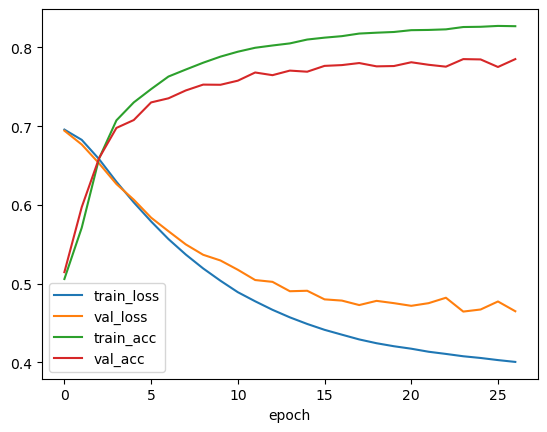

In [21]:
plt.figure()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()